# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt 

In [3]:
from keras.backend import backend
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


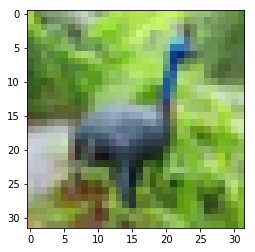

In [10]:
plt.imshow(X_train[6]);

In [11]:
result = np.where(y_train <5)
X_train_0to4 = X_train[result[0]]
y_train_0to4 = y_train[y_train < 5]

result = np.where(y_test <5)
X_test_0to4 = X_test[result[0]]
y_test_0to4 = y_test[y_test < 5]

In [12]:
y_test_0to4

array([3, 0, 1, ..., 3, 3, 1])

In [13]:
result = np.where(y_train >4)
X_train_5to9 = X_train[result[0]]
y_train_5to9 = y_train[y_train > 4]


result = np.where(y_test >4)
X_test_5to9 = X_test[result[0]]
y_test_5to9 = y_test[y_test > 4]

In [14]:
y_test_5to9

array([8, 8, 6, ..., 8, 5, 7])

In [15]:
print(X_train_0to4.shape)
print(y_train_0to4.shape)
print(X_test_0to4.shape)
print(y_test_0to4.shape)



print(X_train_5to9.shape)
print(y_train_5to9.shape)
print(X_test_5to9.shape)
print(y_test_5to9.shape)

(25000, 32, 32, 3)
(25000,)
(5000, 32, 32, 3)
(5000,)
(25000, 32, 32, 3)
(25000,)
(5000, 32, 32, 3)
(5000,)


In [16]:
X_train_0to4 = X_train_0to4/255.
X_test_0to4 = X_test_0to4/255.

In [17]:
print(X_train_0to4.shape)
print(X_train_0to4.shape[0])
print(X_test_0to4.shape)

(25000, 32, 32, 3)
25000
(5000, 32, 32, 3)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [18]:
y_train_0to4 = np_utils.to_categorical(y_train_0to4)
y_test_0to4 = np_utils.to_categorical(y_test_0to4)
num_classes = y_test_0to4.shape[1]

In [19]:
y_test_0to4.shape

(5000, 5)

In [20]:
y_test_0to4[0]

array([0., 0., 0., 1., 0.], dtype=float32)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [21]:
num_classes = y_test_0to4.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

W0907 11:27:56.506242  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 11:27:56.521269  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 11:27:56.523269  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0907 11:27:56.540242  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf

In [22]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train_0to4, y_train_0to4, validation_data=(X_test_0to4, y_test_0to4), epochs=11, batch_size=32)

W0907 11:28:02.495143  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0907 11:28:02.518180  9564 deprecation_wrapper.py:119] From C:\Users\Dhirender.Jit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0907 11:28:02.604335  9564 deprecation.py:323] From C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 5000 samples
Epoch 1/11
25000/25000 [==============================] - 63s 3ms/step - loss: 1.1737 - acc: 0.5011 - val_loss: 1.0292 - val_acc: 0.5784
Epoch 2/11
25000/25000 [==============================] - 67s 3ms/step - loss: 0.9509 - acc: 0.6138 - val_loss: 0.8862 - val_acc: 0.6538
Epoch 3/11
25000/25000 [==============================] - 67s 3ms/step - loss: 0.8667 - acc: 0.6548 - val_loss: 0.8086 - val_acc: 0.6910
Epoch 4/11
25000/25000 [==============================] - 68s 3ms/step - loss: 0.8132 - acc: 0.6768 - val_loss: 0.7216 - val_acc: 0.7252
Epoch 5/11
25000/25000 [==============================] - 70s 3ms/step - loss: 0.7622 - acc: 0.7020 - val_loss: 0.6851 - val_acc: 0.7362
Epoch 6/11
25000/25000 [==============================] - 71s 3ms/step - loss: 0.7277 - acc: 0.7184 - val_loss: 0.6756 - val_acc: 0.7366
Epoch 7/11
25000/25000 [==============================] - 68s 3ms/step - loss: 0.6997 - acc: 0.7290 - val_loss: 0.6708 - val_acc:

In [24]:
loss_and_metrics = model.evaluate(X_test_0to4, y_test_0to4)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

5000/5000 [==============================] - 2s 403us/step
Test loss: 0.6146579588890075
Test accuracy: 0.7718


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          18464     
__________

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [26]:
for layer in range(len(model.layers)-3):
    model.layers[layer].trainable = False

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [27]:
y_train_5to9 = y_train_5to9-5
y_test_5to9 = y_test_5to9-5

In [28]:
y_test_5to9.shape

(5000,)

In [29]:
y_train_5to9 = np_utils.to_categorical(y_train_5to9,5)

In [30]:
y_test_5to9 = np_utils.to_categorical(y_test_5to9, 5)
num_classes = y_train_5to9.shape[1]

In [31]:
y_train_5to9.shape

(25000, 5)

In [32]:
X_train_5to9 = X_train_5to9/255.
X_test_5to9 = X_test_5to9/255.

In [33]:
print(X_train_5to9.shape)
print(X_train_5to9.shape[0])
print(X_test_5to9.shape)

(25000, 32, 32, 3)
25000
(5000, 32, 32, 3)


In [34]:
model.fit(X_train_5to9, y_train_5to9, validation_data=(X_test_5to9, y_test_5to9), epochs=11, batch_size=32)

Train on 25000 samples, validate on 5000 samples
Epoch 1/11
25000/25000 [==============================] - 61s 2ms/step - loss: 0.9021 - acc: 0.6492 - val_loss: 0.6418 - val_acc: 0.7722
Epoch 2/11
25000/25000 [==============================] - 67s 3ms/step - loss: 0.6388 - acc: 0.7612 - val_loss: 0.6098 - val_acc: 0.7640
Epoch 3/11
25000/25000 [==============================] - 69s 3ms/step - loss: 0.5627 - acc: 0.7917 - val_loss: 0.4964 - val_acc: 0.8094
Epoch 4/11
25000/25000 [==============================] - 68s 3ms/step - loss: 0.5045 - acc: 0.8166 - val_loss: 0.4369 - val_acc: 0.8408
Epoch 5/11
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4759 - acc: 0.8256 - val_loss: 0.4199 - val_acc: 0.8476
Epoch 6/11
25000/25000 [==============================] - 73s 3ms/step - loss: 0.4444 - acc: 0.8369 - val_loss: 0.4934 - val_acc: 0.8170
Epoch 7/11
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4268 - acc: 0.8449 - val_loss: 0.4842 - val_acc:

In [35]:
loss_and_metrics = model.evaluate(X_test_5to9, y_test_5to9)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

5000/5000 [==============================] - 2s 407us/step
Test loss: 0.3504010206103325
Test accuracy: 0.8732


# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
from sklearn.datasets import fetch_20newsgroups

In [37]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [38]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

I0907 12:01:43.712842  9564 twenty_newsgroups.py:247] Downloading 20news dataset. This may take a few minutes.
I0907 12:01:43.715842  9564 twenty_newsgroups.py:80] Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


### 8. Test data

In [39]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [69]:
print(len(twenty_train.data))
print(len(twenty_test.data))

print(len(twenty_train.target))
print(len(twenty_test.target))

2257
1502
2257
1502


In [68]:
print(twenty_train.target_names)
print(twenty_test.target_names)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [53]:
twenty_train.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [71]:
vect = TfidfVectorizer( ngram_range=(1, 2))

In [72]:
X_train_dtm = vect.fit_transform(twenty_train.data)
X_test_dtm = vect.transform(twenty_test.data)

In [73]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(2257, 299984)
(1502, 299984)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [74]:
logreg = LogisticRegression(C=1e9)

In [75]:
logreg.fit(X_train_dtm, twenty_train.target)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_pred_class = logreg.predict(X_test_dtm)

In [79]:
print(metrics.accuracy_score(twenty_test.target, y_pred_class))

0.9267643142476698
